<!-- <center>
<h2>
MALLORN Astronomical Classification
</h2>
</center>

<center>
<h2></h2>
<h3></h3>
<h3></h3>
<h3>
Rasmus Eliasson & Oskar Flodin
</h3>
<img src="bth.png" width="100">

<h5>
    M.Sc. Eng. in AI & Machine Learning <br>
    DIDA, Blekinge Institute of Technology<br>
    Karlskrona, Sweden
</h5>

<mail>rael23@student.bth.se <br>
osfl22@student.bth.se</mail>

<p>2025-12-12</p>
</center>
 -->

 <h2 style="text-align:center;">MALLORN Astronomical Classification</h2>

<h3 style="text-align:center;">Rasmus Eliasson & Oskar Flodin</h3>

<div style="text-align:center;">
    <img src="bth.png" width="100">
    <h5 style="margin:4px 0; line-height:1.2;">
        M.Sc. Eng. in AI & Machine Learning<br>
        DIDA, Blekinge Institute of Technology
    </h5>
    <h5 style="margin:4px 0;">Karlskrona, Sweden</h5>
    <a href="mailto:rael23@student.bth.se">rael23@student.bth.se</a><br>
    <a href="mailto:osfl22@student.bth.se">osfl22@student.bth.se</a>
    <p style="text-align:center;">
</div>



<center>
<h2>
    Traditional Machine Learning Approach - Pre processing
</h2>
</center>


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import Dropdown, VBox, interactive_output

import extract_data as ed
from plot_lightcurve import plot_lightcurve


main_folder = "mallorn-astronomical-classification-challenge"
data_folder = "Data"
data_path = os.path.join(os.getcwd(), data_folder)
base_path = os.path.join(os.getcwd(), "mallorn-astronomical-classification-challenge")
path = os.path.join(os.getcwd(), main_folder)

re_extract_data = False


if re_extract_data:
    df_train, df_test = ed.merge_and_save_data()
else:
    df_train = pd.read_csv(os.path.join(data_path, "MALLORN-data_train.csv"), sep=',')
    df_test = pd.read_csv(os.path.join(data_path, "MALLORN-data_test.csv"), sep=',')


split_paths = [
    os.path.join(base_path, d)
    for d in os.listdir(base_path)
    if d.startswith("split_") and os.path.isdir(os.path.join(base_path, d))
]

split_map = {
    os.path.basename(p): p
    for p in split_paths
}

all_splits = {}

for split_name, split_path in split_map.items():
    all_splits[split_name] = {
        "train": pd.read_csv(os.path.join(split_path, "train_full_lightcurves.csv")),
        "test": pd.read_csv(os.path.join(split_path, "test_full_lightcurves.csv")),
    }


df = pd.concat(
    [split_data["train"] for split_data in all_splits.values()],
    ignore_index=True
)

path = os.path.join(os.getcwd(), main_folder)
log_df = pd.read_csv(os.path.join(path, "train_log.csv"))


object_ids = sorted(df["object_id"].unique())


widgets.interact(
    plot_lightcurve,
    object_ID=widgets.Dropdown(options=object_ids),
    df=widgets.fixed(df),
    log_df=widgets.fixed(log_df)
);

interactive(children=(Dropdown(description='object_ID', options=('Dornhoth_anwar_melethron', 'Dornhoth_archam_…

In [2]:
def Null_check_func(split_name):
    split_train = all_splits[split_name]["train"]
    split_test  = all_splits[split_name]["test"]

    fig, axes = plt.subplots(1, 2, figsize=(14, 8))

    sns.heatmap(
        split_train.isnull(),
        cbar=False,
        yticklabels=False,
        cmap="viridis",
        ax=axes[0]
    )
    axes[0].set_title(f"Check for TRAIN NULLs in {split_name}")

    sns.heatmap(
        split_test.isnull(),
        cbar=False,
        yticklabels=False,
        cmap="viridis",
        ax=axes[1]
    )
    axes[1].set_title(f"Check for TEST NULLs in {split_name}")

    plt.show();


widgets.interact(
    Null_check_func,
    split_name=widgets.Dropdown(options=sorted(split_map.keys()))
);


interactive(children=(Dropdown(description='split_name', options=('split_01', 'split_02', 'split_03', 'split_0…

<p>
    Inspection of the light-curve data reveals that the observations are sparse and limited in temporal coverage across filters. Missing measurements typically reflect a lack of observations in a given band, which consequently introduces missing values in the dataset. These missing values are few in the training data and are handled early by excluding rows with insufficient information, in order to avoid introducing artificial signals through imputation.
</p>

<p>
    Due to the short duration, limited number of observations, and irregular sampling of the available light curves, direct time-series modeling is challenging. Feature engineering was therefore performed by aggregating per-filter statistical and temporal descriptors, such as flux statistics and signal-to-noise ratios. Although this approach increases feature dimensionality and introduces correlated attributes, it enables classical machine learning models to capture coarse variability patterns present in the data. The intention is to provide a rich feature representation and subsequently reduce dimensionality through feature selection.
</p>

<hr>
<hr>

<center>
<h2>
    Inspection of feature engineered data
</h2>
</center>




In [3]:
exclude_cols = [
    "English Translation",
    "object_id",
    "split",
    "SpecType",
    "target"
]
common_cols = sorted(
    set(df_train.columns).intersection(df_test.columns) - set(exclude_cols)
)

df_train = df_train.dropna(axis=1, how="all")
df_test  = df_test.dropna(axis=1, how="all")

def attribute_func(Attribute):
    fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharey=True)

    if Attribute in df_train.columns:
        sns.boxplot(data=df_train[[Attribute]], ax=axes[0], color="darkgreen")
    axes[0].set_title(f"Dataset Train: {Attribute}")
    axes[0].set_xlabel("")

    if (Attribute in df_test.columns and Attribute not in exclude_cols):
        sns.boxplot(data=df_test[[Attribute]], ax=axes[1], color="darkred")
    axes[1].set_title(f"Dataset Test: {Attribute}")
    axes[1].set_xlabel("")

    plt.tight_layout()
    plt.show()

widgets.interact(attribute_func, Attribute=common_cols);

interactive(children=(Dropdown(description='Attribute', options=('EBV', 'Z', 'Z_err', 'flux_peak_g', 'flux_pea…

In [4]:
df_map = {
    "train": df_train,
    "test": df_test
}

# Helper: create column intervals.
def make_intervals(df, group_size=6):
    intervals = []
    n_cols = len(df.columns)

    for i in range(0, n_cols, group_size):
        start = i + 1
        end = min(i + group_size, n_cols)
        intervals.append(f"{start}-{end}")

    return intervals


def get_intervals(dataset):
    return make_intervals(df_map[dataset], group_size=6)

# Plot function (controlled by widgets)
def histo_plot(dataset, interval):
    df = df_map[dataset]

    start, end = map(int, interval.split("-"))
    cols = df.columns[start - 1:end]

    df[cols].hist(bins="auto", figsize=(12, 8))
    plt.suptitle(
        f"{dataset.upper()} histograms — columns {interval}",
        fontsize=18
    )
    plt.tight_layout()
    plt.show()

dataset_widget = Dropdown(
    options=["train", "test"],
    value="train",
    description="Dataset:"
)

interval_widget = Dropdown(
    description="Interval:"
)

# Update interval options when dataset changes
def update_intervals(change):
    interval_widget.options = get_intervals(change["new"])
    interval_widget.value = interval_widget.options[0]

dataset_widget.observe(update_intervals, names="value")
update_intervals({"new": dataset_widget.value})

# Layout & display
ui = VBox([dataset_widget, interval_widget])

out = interactive_output(
    histo_plot,
    {
        "dataset": dataset_widget,
        "interval": interval_widget
    }
)

display(ui, out)


df_train.target.value_counts(normalize=True)


Output()

target
0    0.951364
1    0.048636
Name: proportion, dtype: float64

<p>
    Histograms and boxplots were inspected to obtain an overview of the feature distributions in both the training and test data. These plots show that many features exhibit skewness, heavy tails, and contain outliers.
</p>

<p>
    This behavior is expected given the sparse and heterogeneous nature of astronomical observations, as well as the highly imbalanced class distribution (approximately 5% TDEs). Such characteristics motivate the use of models that are robust to non-Gaussian feature distributions.
</p>


In [5]:
features = df_train.copy()

# 1. Create amplitude features (per filter)
bands = ["u", "g", "r", "i", "z", "y"]

for band in bands:
    max_col = f"max_flux_{band}"
    min_col = f"min_flux_{band}"
    if max_col in features.columns and min_col in features.columns:
        features[f"amplitude_{band}"] = features[max_col] - features[min_col]


# 2. Get numeric feature list (exclude target)
numeric_features = (
    features
    .select_dtypes(include="number")
    .columns
    .drop("target", errors="ignore")
)

# 3. Plot function (distribution + reference scatter)
def feature_distribution_vs_class(feature, reference):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    display_name = feature.replace("_", " ").title()
    reference_name = reference.replace("_", " ").title()

    #Left: distribution by class
    sns.histplot(
        data=features,
        x=feature,
        hue="target",
        bins="auto",
        element="step",
        kde=False,
        ax=axes[0]
    )

    axes[0].set_title(f"Distribution of {display_name} by Class")
    axes[0].set_xlabel(display_name)
    axes[0].set_ylabel("Count")

    # Right: feature vs reference
    sns.scatterplot(
        data=features,
        x=feature,
        y=reference,
        hue="target",
        alpha=0.6,
        ax=axes[1]
    )

    axes[1].set_title(f"{display_name} vs {reference_name}")
    axes[1].set_xlabel(display_name)
    axes[1].set_ylabel(reference_name)

    fig.tight_layout()
    plt.show()


# 4. Interactive widgets
widgets.interact(
    feature_distribution_vs_class,
    feature=widgets.Dropdown(
        options=numeric_features,
        description="Feature:"
    ),
    reference=widgets.Dropdown(
        options=numeric_features,
        description="Reference:"
    )
);


interactive(children=(Dropdown(description='Feature:', options=('n_obs_u', 'mean_flux_u', 'std_flux_u', 'max_f…

<p>
    Interactive class-conditional distributions were examined by comparing feature values for TDE and non-TDE objects. Together with scatter plots relating selected features to additional reference features, these visualizations illustrate substantial overlap between classes. This inspection indicates that no single feature provides strong class separability.
</p>

<p>
    From these observations, the plots suggest that predictive information is distributed across multiple features, supporting the need for multivariate decision boundaries rather than reliance on individual features. Consequently, an ensemble-based modeling approach is considered well suited for this problem.
</p>




In [6]:
# Only numeric columns
df_num = df_train.select_dtypes(include=[np.number]).copy()

# Checks if target is boolean in teh dataframe, make it numeric
if "target" in df_train.columns and "target" not in df_num.columns:
    df_num["target"] = pd.to_numeric(df_train["target"], errors="coerce")
# Correlation on numeric values
corr_matrix = df_num.corr(numeric_only=True)
attributes = corr_matrix.columns.tolist()

def correlation_graph(attribute = 'target'):
    corr_with_attribute = corr_matrix[attribute].sort_values(ascending=False)

    # Exclude the 'attribute' itself.
    features = corr_with_attribute.index[corr_with_attribute.index != attribute]

    plot_df = pd.DataFrame({
        "feature": features,
        "correlation": corr_with_attribute[features].values
    })

    # Makes some nice scale for the plot.
    min_corr = round(plot_df['correlation'].min(), 1)
    max_corr = round(plot_df['correlation'].max(), 1)
    margin = 0.05

    plt.figure(figsize=(12,6))
    sns.barplot(x="feature", y="correlation", data=plot_df, hue="correlation", dodge=False, palette="coolwarm")
    plt.xticks(rotation=90)
    plt.ylim(min_corr - margin, max_corr + margin)
    plt.title(f"Correlation of features with {attribute}")
    plt.ylabel(f"Correlation with {attribute}")
    # remove legend, since it does not contribute.
    plt.legend([],[], frameon=False)
    plt.show()

widgets.interact(correlation_graph, attribute = attributes);

interactive(children=(Dropdown(description='attribute', index=62, options=('n_obs_u', 'mean_flux_u', 'std_flux…



<p>
    An interactive feature–feature correlation analysis was performed to assess redundancy and shared information among the engineered features. Several features exhibit moderate to strong correlations, reflecting the aggregation of related statistics derived from the same underlying light-curve measurements.
</p>

<p>
    The presence of correlated features motivates the use of modeling approaches with different inductive biases. Linear models, probabilistic classifiers, tree-based methods, and kernel-based models are known to respond differently to feature collinearity and non-linear interactions. This observation supports the use of a diverse set of base learners within an ensemble framework.
</p>



<hr>
<center>
<h2>Dimensionality Reduction Analysis of TDE Feature Space</h2>
</center>

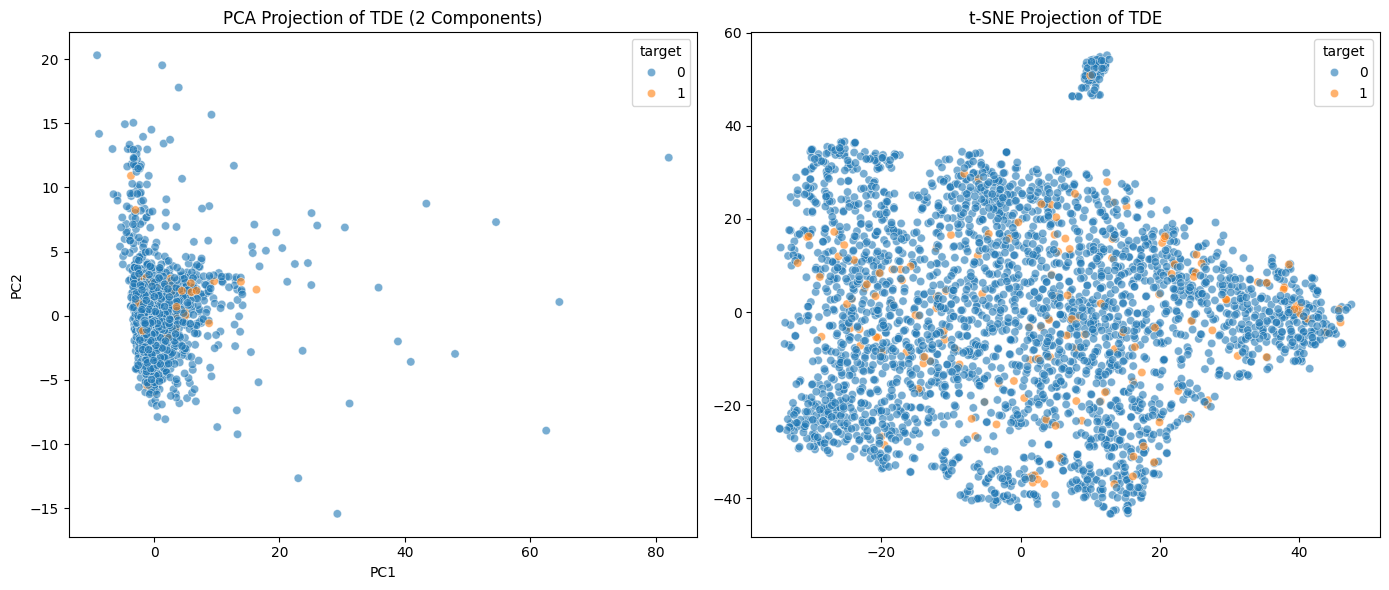

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier


#####################################
#               PCA                 #
#####################################
fig, subfigs = plt.subplots(1, 2, figsize=(14, 6))

df_num.dropna(inplace=True)

X = df_num.drop(columns=exclude_cols, errors="ignore")


# 3. Keep only numeric columns (VERY important for PCA / t-SNE)
X = X.select_dtypes(include="number")
y = df_num['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# PCA computes orthogonal linear combinations of the original features.
# PC1 captures the maximum variance direction; PC2 captures the next,
# orthogonal direction. Class labels are not used.
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

sns.scatterplot(x=components[:,0], y=components[:,1], hue=y, alpha=0.6, ax=subfigs[0])
subfigs[0].set_title("PCA Projection of TDE (2 Components)")
subfigs[0].set_xlabel("PC1")
subfigs[0].set_ylabel("PC2")


#####################################
#              t_SNE                #
#####################################
# t-SNE is a non-linear, unsupervised embedding that preserves local
# neighborhood relationships. It is primarily used for visualization
# and does not preserve global distances or class boundaries.
tsne = TSNE(n_components=2, random_state=42, perplexity=40)
tsne_results = tsne.fit_transform(X_scaled)

sns.scatterplot(x=tsne_results[:,0], y=tsne_results[:,1], hue=y, alpha=0.6, ax=subfigs[1])
subfigs[1].set_title("t-SNE Projection of TDE")
fig.tight_layout()
plt.show()



<p>
    To further assess the structure of the engineered feature space, two-dimensional projections were generated using Principal Component Analysis (PCA) and t-distributed Stochastic Neighbor Embedding (t-SNE). These methods provide complementary views of the data by summarizing global variance structure (PCA) and local neighborhood relationships (t-SNE).
</p>


<p>
    The PCA projection shows that most variance is captured along the first principal component (x-axis), but no clear linear separation between TDE and non-TDE events is observed. The minority TDE class remains largely embedded within the dominant non-TDE population, indicating that directions of maximum variance are not aligned with class boundaries.
</p>

<p>
    The t-SNE projection reveals local clustering patterns, but TDE events do not form a distinct or isolated cluster. Instead, they are dispersed across multiple regions of the feature space, overlapping substantially with non-TDE events. Although the task is formulated as a binary classification problem, this overlap likely reflects similarities between TDEs and other transient phenomena not explicitly modeled in the dataset.
</p>

<hr>

<p>
    Together, these projections suggest that TDE classification is characterized by complex, non-linear structure and significant class overlap. Based on these observations, a stacked ensemble approach was selected to better exploit complementary decision patterns across heterogeneous base models. By combining models with different inductive biases, the ensemble can learn more expressive, non-linear decision boundaries and better utilize weak predictive signals distributed across the feature space.
</p>

<p>
    While individual base models capture different aspects of the data, the meta-model will learn how to weight their predictions to improve robustness and generalization.
</p>



<hr>
<hr>
<center>
<h2>Feature importance</h2>
</center>

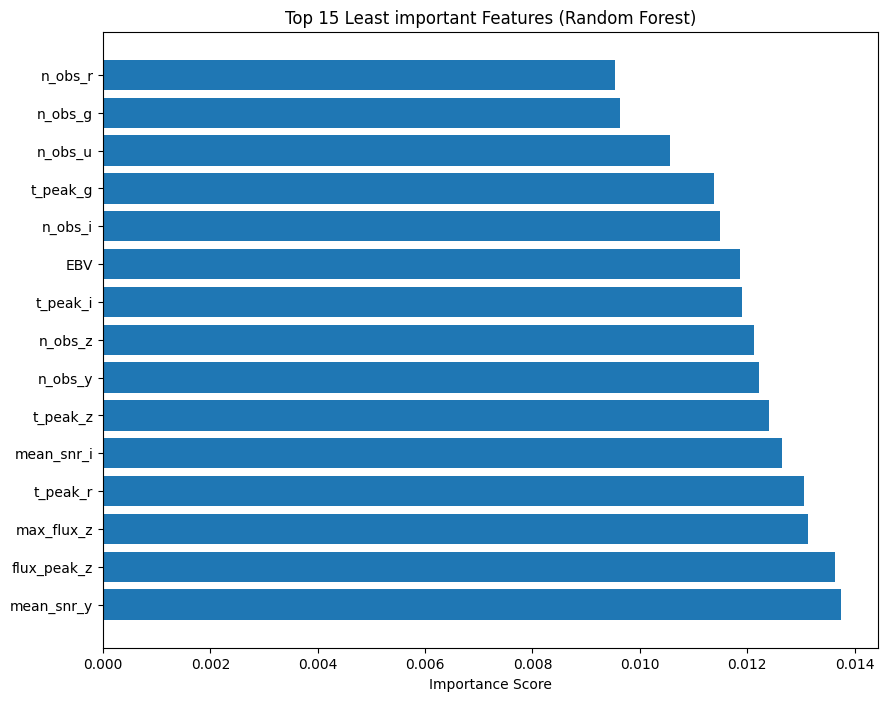

In [8]:
#####################################
#       Feature importance          #
#####################################
drop_cols = [
    "English Translation",
    "object_id",
    "split",
    "target"
]

X = df_num.drop(columns=drop_cols, errors="ignore")
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_
# ascending order.
indices = np.argsort(importances)

plt.figure(figsize=(10,8))
plt.title("Top 15 Least important Features (Random Forest)")
plt.barh([X.columns[i] for i in indices[:15]], importances[indices[:15]])
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.show()

<p>
    A Random Forest model was trained to estimate the relative importance of each engineered feature.
    The plot shows the 15 least important features based on their contribution to the overall
    information gain. These features were considered candidates for removal in order to reduce
    noise among the 62 engineered features.
</p>

<p>
    Random Forests are relatively robust to feature correlations, making them suitable for this
    type of analysis. While the importance scores should not be interpreted as definitive, they
    provide a useful heuristic for identifying features that contribute little to predictive
    performance and may introduce redundancy or noise.
</p>




<hr>
<hr>
<center>
  <h2>
    Model Implementation
  </h2>
</center>





In [9]:
# Model imports.
from custom_wrapped_NN import create_nn_classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
# !pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Stacked ensemble class.
from StackingEnsemble import StackingEnsemble

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split #, StratifiedKFold, cross_validate

random_state = 42
# Split data for training and final validation.
X_train, x_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state= random_state)


n_negative = (y_train == 0).sum()
n_positive = (y_train == 1).sum()
scale_pos_weight = n_negative / n_positive


base_models = {
    "nn": Pipeline([
        ("scaler", StandardScaler()),
        ("nn", create_nn_classifier(
            input_dim=X_train.shape[1],
            numb_classifiers=2,
            random_state = random_state
        ))
    ]),

    "nb": GaussianNB(),

    "xgb": XGBClassifier(
        n_estimators=200,
        learning_rate=0.1,
        # max_depth=6,

        subsample=0.8,
        colsample_bytree=0.8,

        objective="binary:logistic",
        eval_metric="logloss",
        n_jobs = -1,
        random_state = random_state,
        scale_pos_weight=scale_pos_weight
    ),

    "svm_sigmoid": Pipeline([
        ("scaler", StandardScaler()),
        ("svm", SVC(kernel="sigmoid", probability=True, random_state = random_state))
    ]),

    "svm_poly": Pipeline([
        ("scaler", StandardScaler()),
        ("svm", SVC(kernel="poly", probability=True, random_state= random_state))
    ]),


    "qda": Pipeline([
        ("scaler", StandardScaler()),
        ("qda", QuadraticDiscriminantAnalysis(reg_param=0.1))
    ]),

    # # optional: base logistic regression (can be redundant with LR meta-model)
    "logreg_base": Pipeline([
        ("scaler", StandardScaler()),
        ("lr", LogisticRegression(max_iter=1000))
    ]),
    
    "rfc": RandomForestClassifier(random_state=random_state)

}


meta_tree = DecisionTreeClassifier(
    max_depth=3,
    # prevents tiny-leaf overfit
    min_samples_leaf=20,
    # helps with rare TDEs
    class_weight="balanced",
    random_state= random_state
)

# meta_linear = LogisticRegression(max_iter=1000, class_weight='balanced')


stacked_model: StackingEnsemble = StackingEnsemble.load_or_create(
    name="full_model",
    base_models=base_models,
    meta_model=meta_tree,
    n_folds=5,
    excluded_cols=exclude_cols
)


if not stacked_model.check_trained:
    stacked_model.fit(X_train, y_train)


y_pred = stacked_model.predict(x_test)

2026-01-07 14:37:59.841435: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-01-07 14:37:59.863177: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-07 14:38:00.829153: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-01-07 14:38:08.441643: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To tur

Loading model from meta_data/full_model


/usr/local/lib/python3.11/site-packages/sklearn/base.py:463: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.7.1 when using version 1.8.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/base.py:463: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.7.1 when using version 1.8.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/base.py:463: InconsistentVersionWarning: Trying to unpickle estimator GaussianNB from version 1.7.1 when using version 1.8.0. This might lead to breaking code or invalid re



<hr>
<center>
<h2>
    Result by validation data
</h2>
<center>

              precision    recall  f1-score   support

           0     0.9882    0.7039    0.8222       716
           1     0.1276    0.8378    0.2214        37

    accuracy                         0.7105       753
   macro avg     0.5579    0.7709    0.5218       753
weighted avg     0.9459    0.7105    0.7927       753



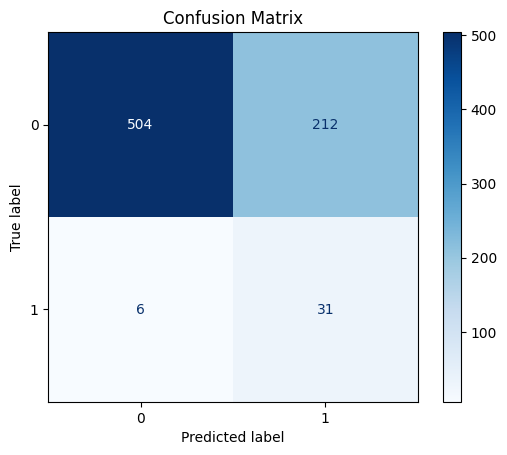

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix

def plot_cm_classification_report(y_true, y_predicted, title = "Confusion Matrix"):
    cm = confusion_matrix(y_true, y_predicted)

    # print(cm)
    print(classification_report(y_true, y_predicted, digits=4))

    # Create display with labels from the unique classes
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=sorted(y_true.unique()))


    disp.plot(cmap="Blues", values_format='d')
    plt.title(title)
    plt.show()


plot_cm_classification_report(y_test, y_pred)


In [11]:
def plot_base_model_confusion(
    base_model: str,
    y_true,
    base_predictions: dict,
    title_prefix="Confusion Matrix"
):
    y_pred = base_predictions[base_model]

    plot_cm_classification_report(y_true, y_pred, title=f"{title_prefix}: {base_model}")


model_y_pred = stacked_model.base_model_predict(x_test)

widgets.interact(
    plot_base_model_confusion,
    base_model=widgets.Dropdown(options=sorted(model_y_pred.keys())),
    y_true=widgets.fixed(y_test),
    base_predictions=widgets.fixed(model_y_pred),
    title_prefix = widgets.fixed("Base model Confusion matrix")
);


interactive(children=(Dropdown(description='base_model', options=('logreg_base', 'nb', 'nn', 'qda', 'rfc', 'sv…




<hr>
<center>
<h2>
    Feature reduction / Selection
</h2>
</center>

In [12]:
from copy import deepcopy
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from IPython.display import clear_output


new_stacked_model: StackingEnsemble

def iterated_feature_reduction(best_score):
    X_current = X_train.copy()
    y_current = y_train.copy()
    x_curr_test = x_test.copy()
    y_curr_test = y_test.copy()

    max_drops = 40
    dropped_features = []
    no_improve_rounds = 0

    best_iteration = 0
    best_base_models = None

    n_dropped = 0

    while n_dropped < max_drops:
        print(f"current iteration: {n_dropped + 1}, current best score: {best_score}")
        # fresh base models every iteration
        new_base_models = deepcopy(base_models)

        new_base_models["nn"] = Pipeline([
            ("scaler", StandardScaler()),
            ("nn", create_nn_classifier(
                input_dim=X_current.shape[1],
                numb_classifiers=2,
                random_state=random_state
            ))
        ])

        new_stacked_model = StackingEnsemble(
            new_base_models,
            meta_model=meta_tree,
            n_folds=5
        )

        # FIT FIRST
        new_stacked_model.fit(X_current, y_current, save = False)

        # THEN PREDICT
        y_pred = new_stacked_model.predict(x_curr_test)
        score = f1_score(y_curr_test, y_pred)

        if score > best_score:
            print(f"Performance improved to {score:.4f}")
            best_score = score
            best_iteration = len(dropped_features)
            best_base_models = deepcopy(new_base_models)

            no_improve_rounds = 0
        else:
            no_improve_rounds += 1

        if no_improve_rounds >= 10:
            print("No improvement in 10 rounds, stopping.")
            break


        if n_dropped % 3 == 0:
            clear_output(wait=True)

        # importances = rf.feature_importances_
        indices = new_stacked_model.lest_order_feature_importances

        least_important_feature = X_current.columns[indices[0]]
        dropped_features.append((least_important_feature, score))

        X_current = X_current.drop(columns=[least_important_feature])
        x_curr_test = x_curr_test.drop(columns=[least_important_feature])

        n_dropped += 1
        print(f"Dropped: {least_important_feature}")

    clear_output(wait=True)
    print("Final dropped features:", dropped_features)

    remove_features = exclude_cols.copy()
    remove_features += [f for f, _ in dropped_features[:best_iteration]]

    
    print("Best score is: ", best_score)
    return remove_features, best_base_models


try:
    new_stacked_model: StackingEnsemble = StackingEnsemble.load_or_create(name="reduced_features_model")
except FileNotFoundError:
    remove_features, new_base_models = iterated_feature_reduction(best_score= f1_score(y_test, y_pred))

    if new_base_models == None:
        print("Did not get better score by reduction!")
        new_stacked_model = stacked_model
    else:
        new_stacked_model = StackingEnsemble(
            base_models = new_base_models,
            meta_model=meta_tree,
            excluded_cols=remove_features,
            n_folds=5,
            name ="reduced_features_model")



remove_features = new_stacked_model.get_excluded_cols

reduced_x_train = X_train.drop(columns=remove_features, errors="ignore")
reduced_x_test = x_test.drop(columns=remove_features, errors="ignore")

reduced_y_train = y_train.copy()
reduced_y_test = y_test.copy()

if not new_stacked_model.check_trained:
    new_stacked_model.fit(reduced_x_train, reduced_y_train)



Loading model from meta_data/reduced_features_model


/usr/local/lib/python3.11/site-packages/sklearn/base.py:463: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.7.1 when using version 1.8.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/base.py:463: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.7.1 when using version 1.8.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/base.py:463: InconsistentVersionWarning: Trying to unpickle estimator GaussianNB from version 1.7.1 when using version 1.8.0. This might lead to breaking code or invalid re



<hr>
<center>
<h2>
    Result by validation data with selected features
</h2>
<center>

              precision    recall  f1-score   support

           0     0.9822    0.8464    0.9092       716
           1     0.1912    0.7027    0.3006        37

    accuracy                         0.8393       753
   macro avg     0.5867    0.7745    0.6049       753
weighted avg     0.9433    0.8393    0.8793       753



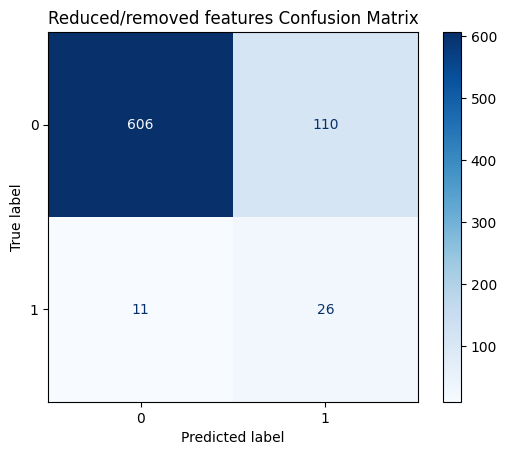

In [13]:
y_pred_reduced = new_stacked_model.predict(reduced_x_test)
plot_cm_classification_report(reduced_y_test, y_pred_reduced, title="Reduced/removed features Confusion Matrix")

In [14]:
model_y_pred_reduced = new_stacked_model.base_model_predict(x_test)

widgets.interact(
    plot_base_model_confusion,
    base_model=widgets.Dropdown(options=sorted(model_y_pred_reduced.keys())),
    y_true=widgets.fixed(reduced_y_test),
    base_predictions=widgets.fixed(model_y_pred_reduced),
    title_prefix = widgets.fixed("Reduced/Removed features, base model Confusion Matrix")
);


interactive(children=(Dropdown(description='base_model', options=('logreg_base', 'nb', 'nn', 'qda', 'rfc', 'sv…

In [15]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
f1_reduced = f1_score(reduced_y_test, y_pred_reduced)

print(f"Original model {f1:.4f} VS reduced noisy and unimportant features {f1_reduced:.4f}")

final_model: StackingEnsemble = stacked_model if f1 > f1_reduced else new_stacked_model
x_test_final = x_test if f1 > f1_reduced else reduced_x_test

final_model.set_name = "Final_model"
final_model.save_model()


Original model 0.2214 VS reduced noisy and unimportant features 0.3006
Model saved to meta_data/Final_model



<p>
  Comparing the full stacked model with the reduced-feature version shows a clear
  improvement in TDE F1 score after removing noisy or low-importance features.
  The reduced model achieves higher precision while maintaining comparable recall,
  indicating that feature pruning helps reduce false positives without severely
  impacting sensitivity.
</p>
<hr>

<center>
    <h3>
        This relatively low F1 performance is likely due to strong feature overlap between TDEs and other types of astronomical transients.
    </h3>
</center>

<p>
  Our stacked model achieves an F1 score of roughly <strong>0.22–0.30</strong> for identifying tidal disruption events (TDEs). A likely reason is <strong>limited class separability</strong>: the engineered light-curve feature vectors for TDEs overlap substantially with those of non-TDE transients. In photometric feature space, several other transient types (e.g., some supernova-like events) can exhibit similar rise/decay behavior and variability statistics, which increases confusion and leads to <strong>many false positives</strong>.
</p>

<p>
  This interpretation is supported by the <strong>PCA</strong> and <strong>t-SNE</strong> projections, which show heavy overlap
  between the TDE and non-TDE samples rather than cleanly separated clusters. This suggests that the performance limitation
  is primarily driven by <strong>overlapping feature distributions</strong> (i.e., the data representation), not merely by the choice of classifier or meta-model.
</p>

<p>
  A plausible direction for future work is to use a <strong>more fine-grained labeling strategy</strong>, such as a
  <strong>multi-class</strong> or <strong>hierarchical</strong> approach that explicitly separates major transient families
  (e.g., supernova subtypes vs. nuclear transients) before making a final TDE decision. The goal would be to reduce
  systematic confusion between TDEs and specific non-TDE populations, which could improve the precision–recall trade-off and
  therefore the TDE F1 score. Note that adding more classes does not automatically guarantee improved performance; it helps
  only if the additional labels reflect genuinely distinct and learnable structure in the data.
</p>

<hr>
<hr>
<center>
<h2>
    Evaluation of base models and stacking effectiveness
</h2>
</center>

ROC AUC: 0.8368


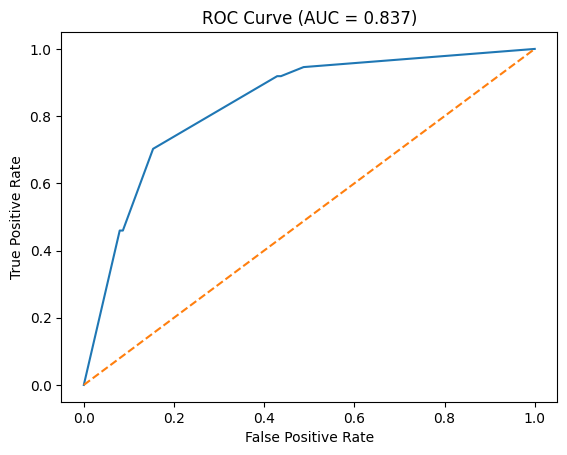

Friedman Test
H0: All base models perform equally (equal mean ranks)
H1: At least one base model performs differently
Test statistic:28.4000, p-value:0.0002
	→ Reject H0: The base models do NOT perform equally.
	→ Proceeding with Nemenyi post-hoc test.

Posthoc nemenyi test:
                    nn        nb       xgb  svm_sigmoid  svm_poly       qda  \
nn           1.000000  0.085327  0.999940     0.007272  0.162371  0.994392   
nb           0.085327  1.000000  0.027402     0.994392  0.999996  0.437482   
xgb          0.999940  0.027402  1.000000     0.001616  0.059740  0.942583   
svm_sigmoid  0.007272  0.994392  0.001616     1.000000  0.969547  0.085327   
svm_poly     0.162371  0.999996  0.059740     0.969547  1.000000  0.615019   
qda          0.994392  0.437482  0.942583     0.085327  0.615019  1.000000   
logreg_base  0.354807  0.998219  0.162371     0.848284  0.999940  0.848284   
rfc          0.902525  0.780488  0.701493     0.280411  0.902525  0.999584   

             logreg_

In [16]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


y_prob = final_model.predict_proba(x_test_final)[:, 1]

# “If I randomly pick one positive and one negative, how often does the model rank the positive higher?”
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC: {roc_auc:.4f}")


fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve (AUC = {roc_auc:.3f})")
plt.show()


friedman_stat , friedman_p = final_model.friedman
print("Friedman Test")
print("H0: All base models perform equally (equal mean ranks)")
print("H1: At least one base model performs differently")

print(f"Test statistic:{friedman_stat:.4f}, p-value:{friedman_p:.4f}")

if friedman_p < 0.05:
    print("\t→ Reject H0: The base models do NOT perform equally.")
    print("\t→ Proceeding with Nemenyi post-hoc test.\n")
else:
    print("\t→ Fail to reject H0: No significant difference between base models.")



print("Posthoc nemenyi test:\n", final_model.posthoc_nemenyi)


<p>
    The ROC–AUC curve indicates that the final stacked model ranks positive
    (TDE) samples higher than non-TDE samples substantially more often than
    random chance. An AUC of approximately <strong>0.84</strong> suggests that
    the model captures meaningful discriminative information, even though
    threshold-dependent metrics such as F1 remain limited by class overlap and
    imbalance.
</p>

<p>
    Statistical testing further supports the suitability of the stacking
    approach. The Friedman test indicates statistically significant differences
    in performance among the base models (<em>p &lt; 0.002</em>), rejecting the
    null hypothesis that all models perform equivalently.
</p>

<p>
    The Nemenyi post-hoc analysis identifies several base-model pairs with
    significantly different ranks, confirming heterogeneity in model behavior.
    This heterogeneity is a necessary condition for effective stacking, as it
    allows the ensemble to exploit complementary strengths rather than redundant
    predictions.
</p>


<hr>
<center>
<h2>
    Retrain the final model, but with all provided training data
</h2>
</center>

In [17]:
finshed_model = deepcopy(final_model)
finshed_model.set_name = "finished_model"

x_full = X.copy().drop(columns=finshed_model.get_excluded_cols, errors="ignore")
y_full = y

try:
    finshed_model = StackingEnsemble.load_or_create(name='finished_model')
except:
    finshed_model.fit(x_full, y_full, save= True)

Loading model from meta_data/finished_model


/usr/local/lib/python3.11/site-packages/sklearn/base.py:463: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.7.1 when using version 1.8.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/base.py:463: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.7.1 when using version 1.8.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/base.py:463: InconsistentVersionWarning: Trying to unpickle estimator GaussianNB from version 1.7.1 when using version 1.8.0. This might lead to breaking code or invalid re

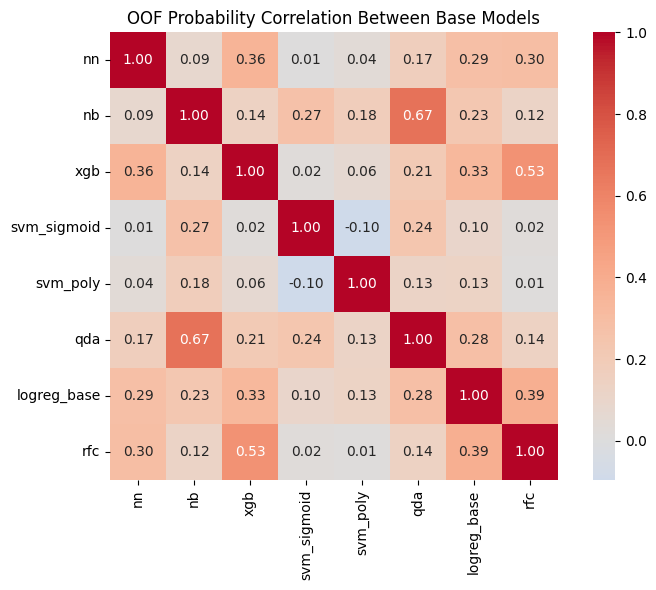

In [18]:
corr_df = finshed_model.evaluate_base_models()

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_df,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True
)
plt.title("OOF Probability Correlation Between Base Models")
plt.tight_layout()
plt.show()

<p>
    This heatmap shows the correlation matrix of out-of-fold (OOF) predicted probabilities for the base models. OOF predictions are generated on validation folds not seen during training, ensuring an unbiased estimate of each models behavior.
</p>

<p>
    These OOF probabilities are the inputs used to train the meta-model. The generally low to moderate correlations indicate that the base models capture complementary aspects of the data rather than producing redundant, identical predictions. This diversity provides meaningfull information for the meta-model to make a final prediction.
</p>

<p>
    Some model pairs do exhibit moderate correlation, which indicate partial redundancy. However, sufficient diversity remains for stacking to be beneficial and improve performance.
</p>

<p>
    Altogether, the statistical tests and out-of-fold prediction probability correlations indicate that the base models exhibit complementary error patterns. Combined with the improved ROC–AUC, this provides strong evidence that the stacked ensemble operates as intended, even though absolute performance is constrained by feature overlap in the data.
</p>



<hr>
<hr>
<center>
<h2>
    Result & Diskussion
</h2>
</center>


In [19]:
from classify import create_submissionfile

create_submission = False

if create_submission:
    submission_df = create_submissionfile(model_name = "finished_model")
else:
    submission_folder = os.path.join(os.getcwd(), "submission_files", "submission_0.csv")
    submission_df = pd.read_csv(submission_folder, sep = ",")


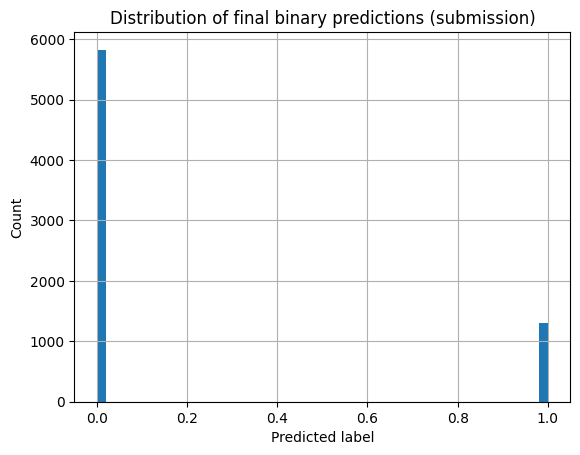

Class distribution in submission:
prediction
0    5825
1    1310
Name: TDE, dtype: int64 

prediction
0    0.816398
1    0.183602
Name: proportion, dtype: float64 

Class distribution in y train:
target
0    2863
1     147
Name: Count_true, dtype: int64


target
0    0.951163
1    0.048837
Name: proportion, dtype: float64

In [20]:
submission_df["prediction"].hist(bins=50)
plt.xlabel("Predicted label")
plt.ylabel("Count")
plt.title("Distribution of final binary predictions (submission)")
plt.show()


sub_dist = (
    submission_df["prediction"]
    .value_counts()
    .sort_index()
    .rename("TDE")
)

print("Class distribution in submission:")
print(sub_dist, "\n")
print(submission_df["prediction"].value_counts(normalize=True), "\n")

train_dist = (
    y
    .value_counts()
    .sort_index()
    .rename("Count_true")
)

print("Class distribution in y train:")
print(train_dist)
y.value_counts(normalize=True)

<p>
    From this submission distribution, we see that the finished model has classified <strong>1506</strong> TDEs out of <strong>7135</strong>. Thus, approximately <strong>21%</strong> of the events are classified as TDEs. This is significantly higher than the fraction in the training data, which is only about <strong>5%</strong>.
</p>

<p>
    It has also become apparent that the Kaggle dataset is not representative of true astrophysical prevalence. The training data contains <strong>147</strong> labeled TDEs, while the total number of <em>confirmed</em> tidal disruption events globally is only around <strong>134</strong>, according to the comprehensive TDE catalog presented in
    <em>Repeating Flares, X-ray Outbursts and Delayed Infrared Emission</em>
    (<a href="https://arxiv.org/abs/2506.05476" target="_blank" rel="noopener noreferrer">
        Langis et&nbsp;al., 2025
    </a>).
</p>

<p>
    This suggests that the dataset may include simulated, augmented, or highly similar events rather than fully independent observations. While the out-of-fold (OOF) evaluation strategy prevents direct data leakage, reduced effective independence between samples could negatively impact generalization performance. This may help explain the drop in performance observed on the Kaggle validation leaderboard.
</p>

<p>
    As observed in the PCA and t-SNE projections, TDEs are not clearly separable from other transient classes in the engineered feature space. Several non-TDE transients, such as supernovae, can exhibit light-curve properties similar to TDEs, increasing class overlap. Framing the task as a binary classification problem may therefore limit performance. A multi-class formulation that explicitly models additional transient types could allow the model to learn more informative decision boundaries and potentially improve classification performance.
</p>

<hr>


<center>
<h2>
    Further studies / future work
</h2>
</center>

<ol>
    <li>
        <strong>Improved feature engineering and preprocessing</strong>
        <p>
            Further analysis of feature extraction and preprocessing could improve performance. This includes refining summary statistics, handling missing values more systematically, and evaluating the impact of correlated or redundant features. Additionally, ensuring that any simulated or augmented samples are handled consistently across training and validation folds could help maintain effective sample independence.
        </p>
    </li>
    <li>
        <strong>Deep learning approaches</strong>
        <p>
            Deep learning models, particularly sequence-based architectures, could potentially improve performance by learning temporal patterns directly from light curves rather than relying on static summary features.
        </p>
    </li>
    <li>
        <strong>Optimized decision thresholds</strong>
        <p>
            Within this project, a default decision threshold was used. For highly imbalanced problems, selecting an application-specific threshold could provide a better balance between recall and precision, depending on the desired operating point.
        </p>
    </li>
    <li>
        <strong>Multi-class classification</strong>
        <p>
            Introducing additional transient classes could reduce model confusion by allowing more informative decision boundaries, potentially improving discrimination between <strong>TDE</strong> and <strong>non-TDE</strong> events.
        </p>
    </li>
    <li>
        <strong>Include redshift error in training</strong>
        <p>
        The training data only provides redshift (<strong>z</strong>) and does not include a redshift uncertainty term (<strong>z_err</strong>), while the Kaggle test set contains both. To handle this mismatch, redshift uncertainty is approximated at inference time by evaluating the model at perturbed values (<strong>z</strong>, <strong>z + z_err</strong>, and <strong>z - z_err</strong>) and combining the predictions via soft voting. If redshift uncertainty were available in the training data, it could instead be incorporated directly as a feature or modeled probabilistically during training.
        </p>
    </li>
</ol>